# Loading python modules

In [1]:
# general modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import display
from pprint import pprint

In [2]:
# stats
from scipy import stats

In [3]:
# disable warnings
import warnings
warnings.simplefilter('ignore')

In [4]:
# my own modules
from stat_tests import *
from corr_plot import *

In [5]:
# common functions
def sig_diff(p_value):
    # get significant differences
    if p_value < 0.001:
        return 'extremely'
    elif p_value < 0.01:
        return 'highly'
    elif p_value < 0.05:
        return 'significant'
    else:
        return 'not significant'

In [6]:
def pref_stats(data, features):
    liked = []
    disliked = []
    chisq = []
    diff = []
    for feature in features:
        like_count = len(data[data[feature] > 3])
        dislike_count = len(data[data[feature] <= 3])
        liked.append(like_count)
        disliked.append(dislike_count)
        ch, p = stats.chisquare(
            [like_count, dislike_count],
            ddof = 0,
            axis = None)
        chisq.append(p)
        
        # get significant differences
        diff.append(sig_diff(p))
    
    result = pd.DataFrame({'feature': features,
                           'N liked': liked,
                           'N disliked': disliked,
                           '% like': np.array(liked) / len(data),
                           'chi2_p': chisq,
                           'significance': diff})
    # specify order for columns
    result = result[['feature', 'N liked', 
                     'N disliked', '% like',
                     'chi2_p', 'significance']]
    return result

# Importing data

In [7]:
raw = pd.read_csv('./responses.csv')
raw.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


we want to view all 150 columns

In [8]:
pd.set_option('display.max_columns', 150)
raw.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

# Initial observations

In [9]:
raw.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

## Missing values

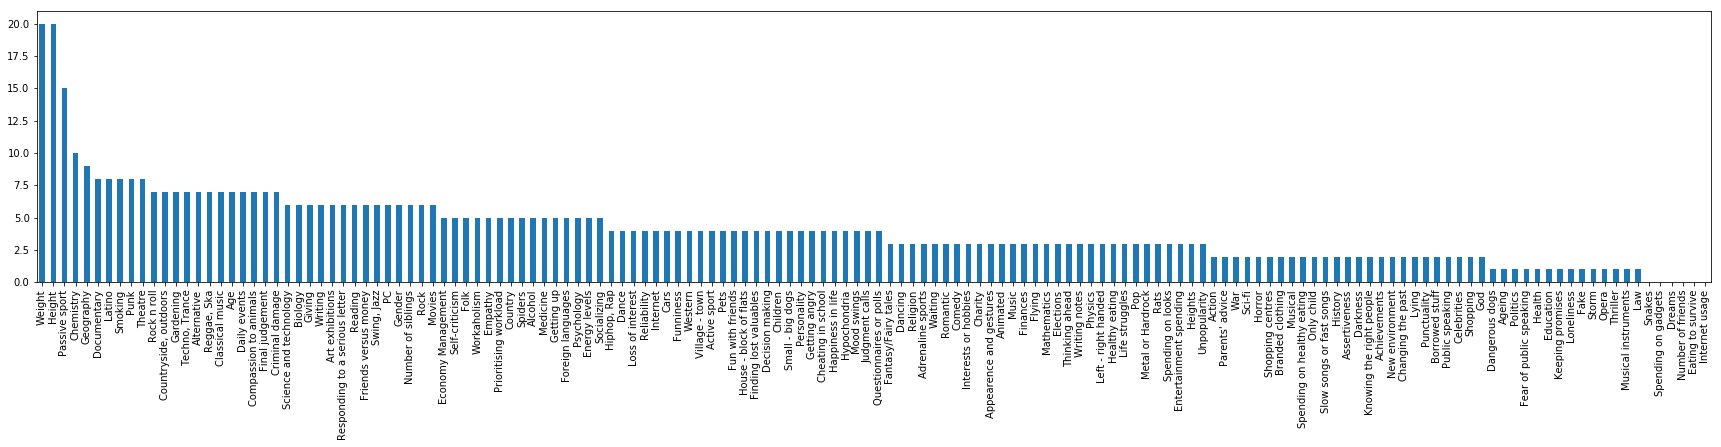

In [10]:
nulls = raw.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize=(30,5))

Weight and height are the two columns with the highest number of missing values.

Part of dealing with missing values is form an insight on why are they missing, and if the values are missing due to reasons that may affect the assumption and outcome of an analysis.

In [11]:
n = raw[raw['Gender'] == 'female']['Weight'].isnull().sum()
print(f'number of females who omitted weight: {n}')
n = raw[raw['Gender'] == 'male']['Weight'].isnull().sum()
print(f'number of males who omitted weight: {n}')

n = raw[raw['Gender'] == 'female']['Height'].isnull().sum()
print(f'number of females who omitted height: {n}')
n = raw[raw['Gender'] == 'male']['Height'].isnull().sum()
print(f'number of males who omitted height: {n}')

number of females who omitted weight: 13
number of males who omitted weight: 6
number of females who omitted height: 13
number of males who omitted height: 6


weight and height have same number of ommits... seems fishy. Twyman's law: "Any piece of data or evidence that looks interesting or unusual is probably wrong!". In other words, it is much rarer to get interesting data than simply wrong data. Let's investigate further.

In [12]:
either = raw[raw['Weight'].isnull() | 
             raw['Height'].isnull()]
n = either.shape[0]
print('number of people who omitted either weight or height:', n)

both = raw[raw['Weight'].isnull() &
           raw['Height'].isnull()]
n = both.shape[0]
print('amongst the above, number of people who omitted both weight or height:', n)

number of people who omitted either weight or height: 30
amongst the above, number of people who omitted both weight or height: 10


So this does not indicate much. Let's see if the missing values are related to other missing values.

In [13]:
print('number of people who have missing valuees in either weight or height as well as in other cols')
either.isnull().sum().sort_values(ascending=False).head(5)

number of people who have missing valuees in either weight or height as well as in other cols


Weight                20
Height                20
Number of siblings     6
Age                    5
Music                  2
dtype: int64

In [14]:
print('number of people who have missing valuees in both weight and height as well as in other cols')
both.isnull().sum().sort_values(ascending=False).head(5)

number of people who have missing valuees in both weight and height as well as in other cols


Weight                10
Height                10
Number of siblings     6
Age                    4
Music                  1
dtype: int64

Interestingly, the people who omitted number of siblings and age tend to omitt both weight and height. This suggests the people do not want to be identified by those attributes.

In [15]:
n = raw['Number of siblings'].isnull().sum()
print('total number of people with missing number of siblings:', n)

total number of people with missing number of siblings: 6


Notice that all those who omitted the number of siblings omitted both weight and height. Did they omitt other fields?

In [16]:
_ = raw[raw['Number of siblings']\
    .isnull()].isnull().sum()\
    .sort_values(ascending=False)
display(_)

Number of siblings       6
Weight                   6
Height                   6
Age                      4
New environment          1
Psychology               1
God                      1
Gender                   1
Small - big dogs         1
Medicine                 0
Dancing                  0
Countryside, outdoors    0
Religion                 0
Art exhibitions          0
Cars                     0
Law                      0
Chemistry                0
Foreign languages        0
Geography                0
Reading                  0
Biology                  0
Economy Management       0
PC                       0
Musical instruments      0
Active sport             0
Writing                  0
Passive sport            0
Snakes                   0
Spiders                  0
Heights                  0
                        ..
Loss of interest         0
Keeping promises         0
Reliability              0
Final judgement          0
Workaholism              0
Charity                  0
W

looks like they still filled most of the other columns, this supports the hypothesis that they did not fill the Height, Weight, Number of Siblings and Age for reasons of anonymity.

# Define the different columns

In [17]:
genre_cols = ['Dance', 'Folk', 'Country', 'Classical music',
              'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
              'Punk', 'Hiphop, Rap', 'Reggae, Ska',
              'Swing, Jazz', 'Rock n roll', 'Alternative',
              'Latino', 'Techno, Trance', 'Opera']

demo_cols = ['Only child', 'Village - town', 
             'House - block of flats', 'Education',
             'Left - right handed', 'Gender',
             'Number of siblings', 'Age', 'Height',
             'Weight']

interests_cols = ['Music', 'Movies', 'History', 'Psychology', 
                  'Politics', 'Mathematics', 'Physics',
                  'Economy Management', 'Biology', 
                  'Chemistry', 'Reading', 'Geography',
                  'Foreign languages', 'Medicine',
                  'Law', 'Cars', 'Art exhibitions',
                  'Religion', 'Countryside, outdoors',
                  'Dancing', 'Musical instruments', 
                  'Writing', 'Passive sport', 'Active sport',
                  'Adrenaline sports','Gardening', 
                  'Celebrities', 'Shopping',
                  'Science and technology', 'Theatre',
                  'Pets', 'Flying', 'Healthy eating',
                  'Daily events']

spending_cols = [
    'Shopping centres', 'Branded clothing',
    'Entertainment spending', 'Spending on looks',
    'Spending on gadgets', 'Spending on healthy eating'
]

print('number of genre cols:', len(genre_cols))
print('number of demographic cols:', len(demo_cols))
print('number of interest cols:', len(interests_cols))
print('number of spending cols:', len(spending_cols))

number of genre cols: 17
number of demographic cols: 10
number of interest cols: 34
number of spending cols: 6


# Highest rated genres overall

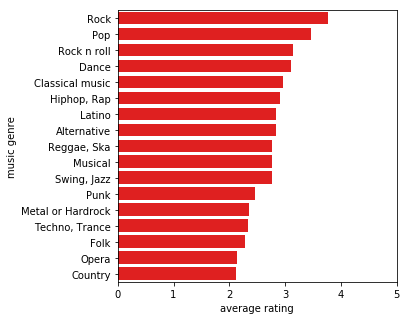

In [18]:
_ = raw[genre_cols].mean().sort_values(ascending=False)
df = pd.DataFrame(
    {'music genre': _.axes[0],
     'average rating': _.tolist()}
)
fig, ax = plt.subplots(figsize=(5,5))
_ = sns.barplot(data=df, x='average rating', y='music genre',
                ax = ax, color='red')
_ = ax.set_xlim([0, 5])

And this is how people have rated each genre

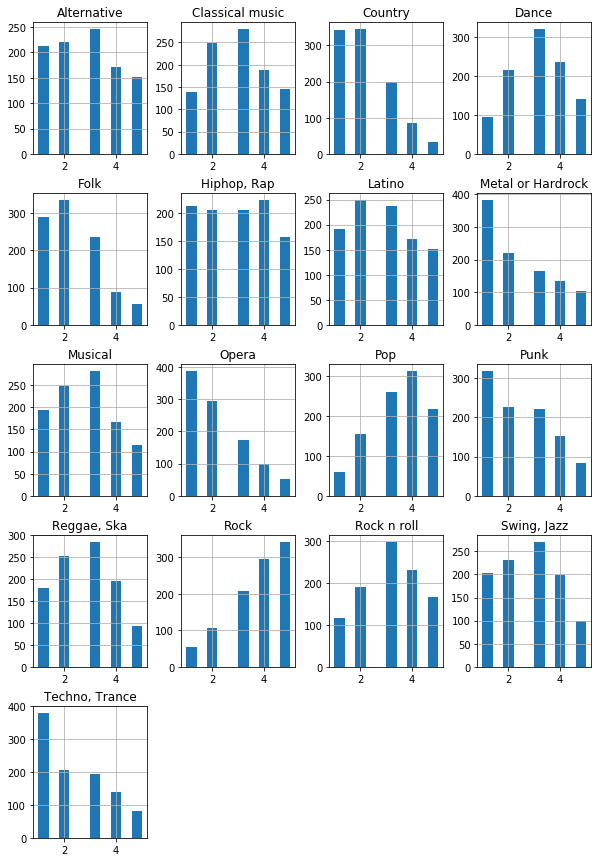

In [19]:
fig, ax = plt.subplots(figsize=(10,15))
_ = raw[genre_cols].hist(ax=ax)

# Highest rated interests overall

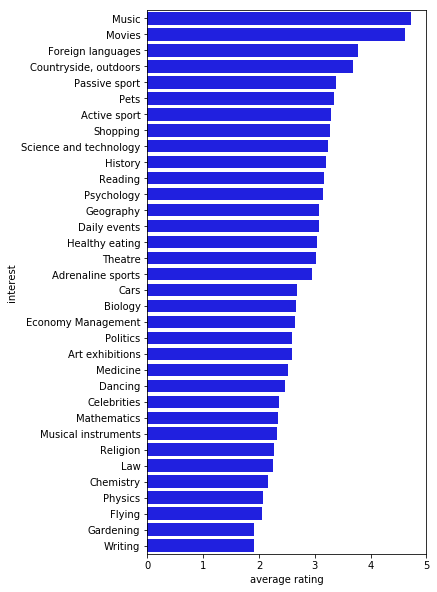

In [20]:
_ = raw[interests_cols].mean().sort_values(ascending=False)
df = pd.DataFrame(
    {'interest': _.axes[0],
     'average rating': _.tolist()}
)
fig, ax = plt.subplots(figsize=(5,10))
_ = sns.barplot(data=df, x='average rating', y='interest',
                ax = ax, color='blue')
_ = ax.set_xlim([0, 5])

top10_interests = df.head(10)['interest']

This is how people have rated in the top 10 categories:

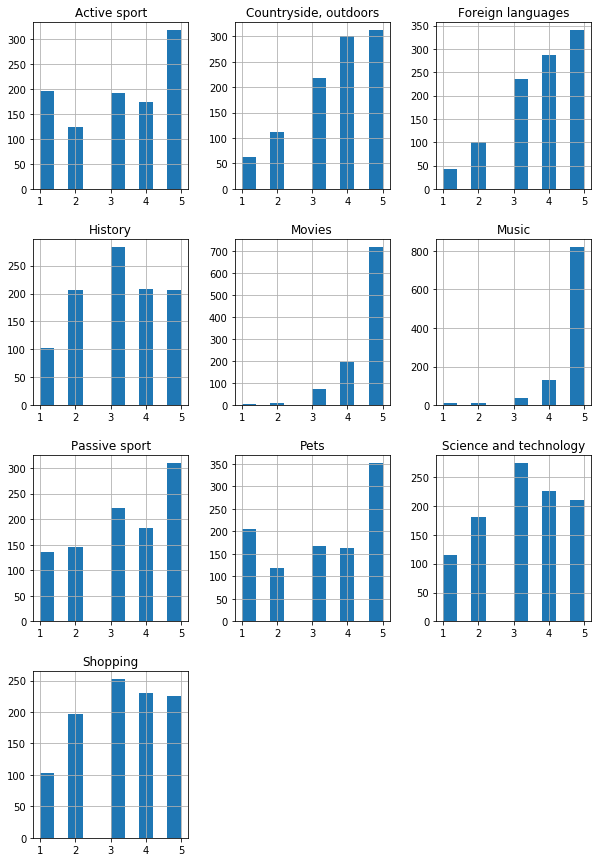

In [21]:
fig, ax = plt.subplots(figsize=(10,15))
_ = raw[top10_interests].hist(ax=ax)

# Highest rated spending activities

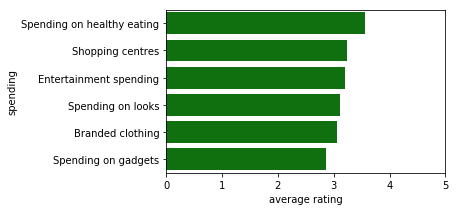

In [22]:
_ = raw[spending_cols].mean().sort_values(ascending=False)
df = pd.DataFrame(
    {'spending': _.axes[0],
     'average rating': _.tolist()}
)
fig, ax = plt.subplots(figsize=(5,3))
_ = sns.barplot(data=df, x='average rating', y='spending',
                ax = ax, color='green')
_ = ax.set_xlim([0, 5])

And this is how people have rated in each category:

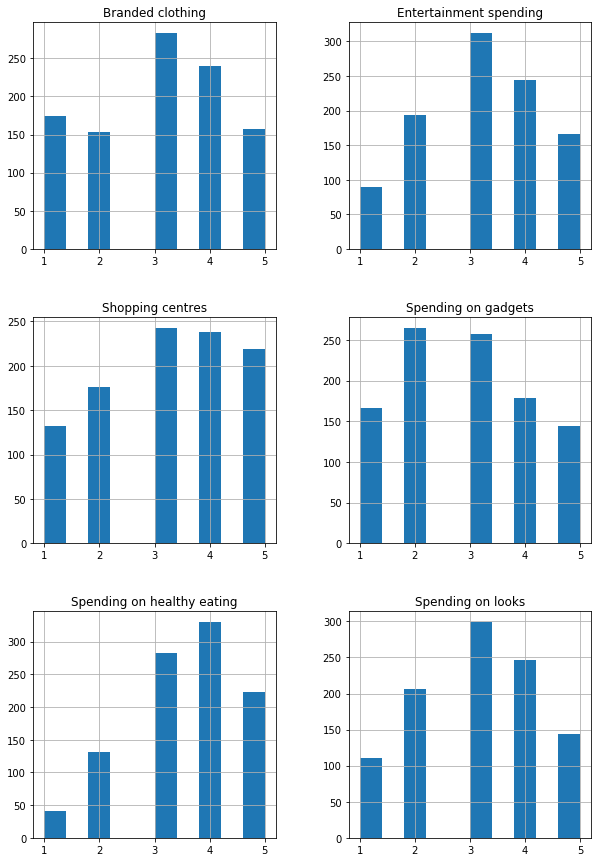

In [23]:
fig, ax = plt.subplots(figsize=(10,15))
_ = raw[spending_cols].hist(ax=ax)

# Music genre preference vs demographics

Best way to see if demographics has any sway on music genre preference is to plot out the correlation coefficients.

Here we plot a heat map of the correlation coefficients:

## Preparing data

Before we can make the plot, we note that some of the demographic data is not numerical:  e.g. gender is 'male' and 'female'.  Correlation can only be calculated between numerical data, so we need to do some transformation.

Further more, there are missing data in the set we need to deal with.  For simplicity, we will throw away the rows with missing data in it.

### Throw away missing data

In [24]:
df = raw[demo_cols + genre_cols].dropna()
display(df.head())
print('We have lost {} columns from cleaning'
      .format(len(raw) - len(df)))

,Only child,Village - town,House - block of flats,Education,Left - right handed,Gender,Number of siblings,Age,Height,Weight,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,no,village,block of flats,college/bachelor degree,right handed,female,1.0,20.0,163.0,48.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,no,city,block of flats,college/bachelor degree,right handed,female,2.0,19.0,163.0,58.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,no,city,block of flats,secondary school,right handed,female,2.0,20.0,176.0,67.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,yes,city,house/bungalow,college/bachelor degree,right handed,female,1.0,22.0,172.0,59.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,no,village,house/bungalow,secondary school,right handed,female,1.0,20.0,170.0,59.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0


We have lost 118 columns from cleaning


### Convert non-numerical data

In [25]:
non_num_cols = ['Only child', 
                'Village - town',
                'House - block of flats',
                'Education',
                'Left - right handed',
                'Gender']

print('non numerical columns are:')
print(non_num_cols)

print()
print('the unique values for each cols are:')
for feature in non_num_cols:
    print(df[feature].unique())

non numerical columns are:
['Only child', 'Village - town', 'House - block of flats', 'Education', 'Left - right handed', 'Gender']

the unique values for each cols are:
['no' 'yes']
['village' 'city']
['block of flats' 'house/bungalow']
['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil']
['right handed' 'left handed']
['female' 'male']


We can now create replacement mappings, and proceed

In [26]:
# mapping non-numerical columns
num_mapping = {'Only child':{'no':0, 'yes':1},
           'Village - town':{'village':0, 'city':1},
           'House - block of flats':{'house/bungalow':0, 'block of flats':1},
           'Education':{'currently a primary school pupil':0,
                        'primary school':1,
                        'secondary school':2,
                        'college/bachelor degree':3,
                        'masters degree':4,
                        'doctorate degree':5},
           'Left - right handed':{'right handed': 0, 'left handed': 1},
           'Gender':{'male':0, 'female':1}}
df1 = df.replace(num_mapping)

print('mapping:')
pprint(num_mapping)

display(df1.head())
print('\nsummary statistics:')
display(df1.describe())

mapping:
{'Education': {'college/bachelor degree': 3,
               'currently a primary school pupil': 0,
               'doctorate degree': 5,
               'masters degree': 4,
               'primary school': 1,
               'secondary school': 2},
 'Gender': {'female': 1, 'male': 0},
 'House - block of flats': {'block of flats': 1, 'house/bungalow': 0},
 'Left - right handed': {'left handed': 1, 'right handed': 0},
 'Only child': {'no': 0, 'yes': 1},
 'Village - town': {'city': 1, 'village': 0}}


,Only child,Village - town,House - block of flats,Education,Left - right handed,Gender,Number of siblings,Age,Height,Weight,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,0,0,1,3,0,1,1.0,20.0,163.0,48.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,0,1,1,3,0,1,2.0,19.0,163.0,58.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,0,1,1,2,0,1,2.0,20.0,176.0,67.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,1,1,0,3,0,1,1.0,22.0,172.0,59.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,0,0,0,2,0,1,1.0,20.0,170.0,59.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0



summary statistics:


,Only child,Village - town,House - block of flats,Education,Left - right handed,Gender,Number of siblings,Age,Height,Weight,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,0.244395,0.707399,0.598655,2.300448,0.096413,0.593049,1.293722,20.449552,173.395740,66.338565,3.104260,2.289238,2.128924,2.968610,2.779148,3.480942,3.757848,2.354260,2.437220,2.904709,2.765695,2.772422,3.153587,2.840807,2.860987,2.331839,2.170404
std,0.429969,0.455212,0.490446,0.773785,0.295322,0.491541,1.020027,2.857783,10.118895,13.570688,1.171732,1.144634,1.081512,1.260254,1.279859,1.171431,1.178604,1.370711,1.287723,1.366958,1.201398,1.256544,1.228158,1.339797,1.327750,1.323099,1.203296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,62.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,19.000000,167.000000,55.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,20.000000,173.000000,64.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,0.000000,1.000000,1.000000,3.000000,0.000000,1.000000,2.000000,22.000000,180.000000,75.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
max,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,10.000000,30.000000,203.000000,150.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can now plot the heat map.

## Heat map

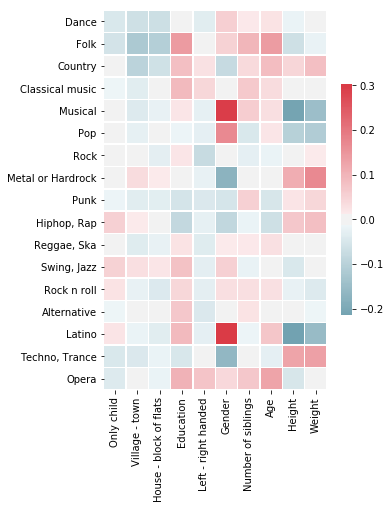

In [27]:
_ = plot_corr_heatmap(df1, demo_cols, df1, genre_cols)

Initial observations:
- There is a strong correlation between gender and preference over Musical, Latino, Metal and Techno. Females seems to prefer Musical and Latino, males tend to prefer Metal and Techo.  We will dig deeper later
- There is a strong correlation between height/weight and music genres. Surely these are due to gender?

## Weight and height

Gender height and weight differences:

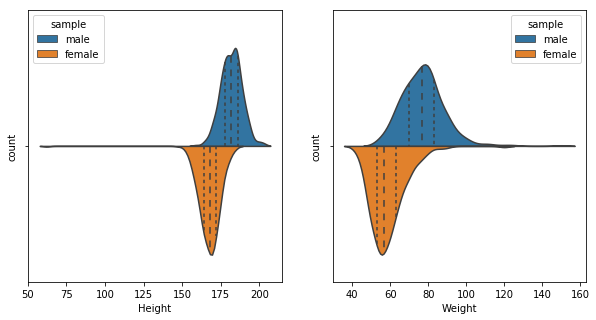

In [28]:
_ = plot_dist_compare(
    {
        'male': df[df['Gender'] == 'male'],
        'female': df[df['Gender'] == 'female']
    },
    ['Height', 'Weight']
)

There is clear gender differences, are they statistically significant?  That is, are they possibly caused by sampling error?

In [29]:
_ = ttest_features(
    {
        'male': df[df['Gender'] == 'male'],
        'female': df[df['Gender'] == 'female']
    },
    ['Height', 'Weight']
)
display(_)

,features,N male,N female,ttest p,significance
0,Height,363,529,2.337408e-127,extremely
1,Weight,363,529,2.160947e-115,extremely


This difference is definitely real.

To comfirm that the correlation we are seeing between music genre and height/weight are contributed by gender, let's look at correlations in female and male populations separately:

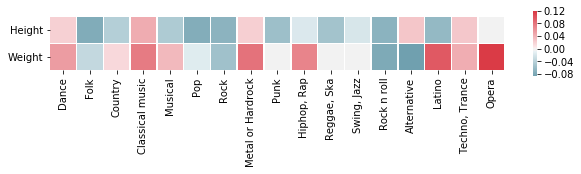

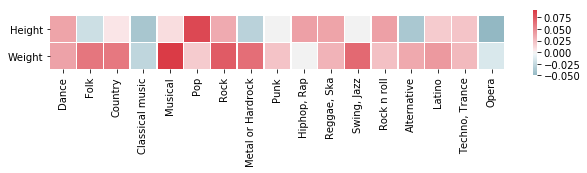

In [30]:
cats = ['male', 'female']
for gender in cats:
    _ = plot_corr_heatmap(
          df1[df['Gender'] == gender], genre_cols,
          df1[df['Gender'] == gender], ['Height', 'Weight'],
          scale=1.2)

Colours may be misleading, look at the max and min numbers, they are tiny!

We can check further by doing a t-test on the difference of preferences in Opera between males of different weights, for example. But the correlation here is so small that we can safely say that there is nothing interesting here.

We will therefore disregard height and weight as irrelevant for genre preferences --- something not so surprising

## Gender vs genre preferences

There is a clear correlation between gender and genre preference. Females appear to like Latino and Musicals more , and males seems to prefer Techno and Metal. Are these differences real? After all the correlations are not that big.

### Gender divide in the overall data

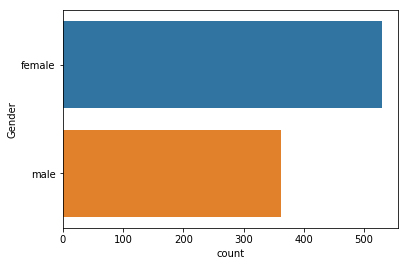

In [31]:
_ = sns.countplot(data = df, y = 'Gender')

There are more females in the sample than males.

### Genres where there are significant gender differences

In [32]:
sig = ttest_features(
    {
        'male': df[df['Gender'] == 'male'],
        'female': df[df['Gender'] == 'female']
    },
    genre_cols
)
display(sig)

,features,N male,N female,ttest p,significance
14,Latino,363,529,2.999465e-20,extremely
4,Musical,363,529,2.984331e-19,extremely
7,Metal or Hardrock,363,529,2.267940e-07,extremely
5,Pop,363,529,2.912230e-07,extremely
15,"Techno, Trance",363,529,1.257629e-06,extremely
9,"Hiphop, Rap",363,529,1.157593e-02,significant
2,Country,363,529,1.897652e-02,significant
0,Dance,363,529,8.255157e-02,not significant
11,"Swing, Jazz",363,529,1.109651e-01,not significant
8,Punk,363,529,1.211566e-01,not significant


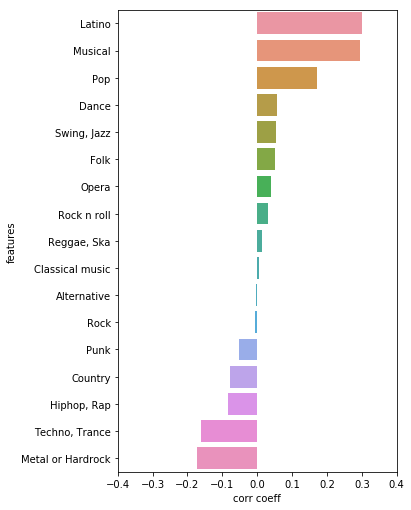

In [33]:
_ = plot_corr_ranking(
    df1, 'Gender',
    df1, genre_cols,
    xlim=(-0.4,0.4)
)

Let's plot the distributions of ratings for the genres that display significant differences between genders

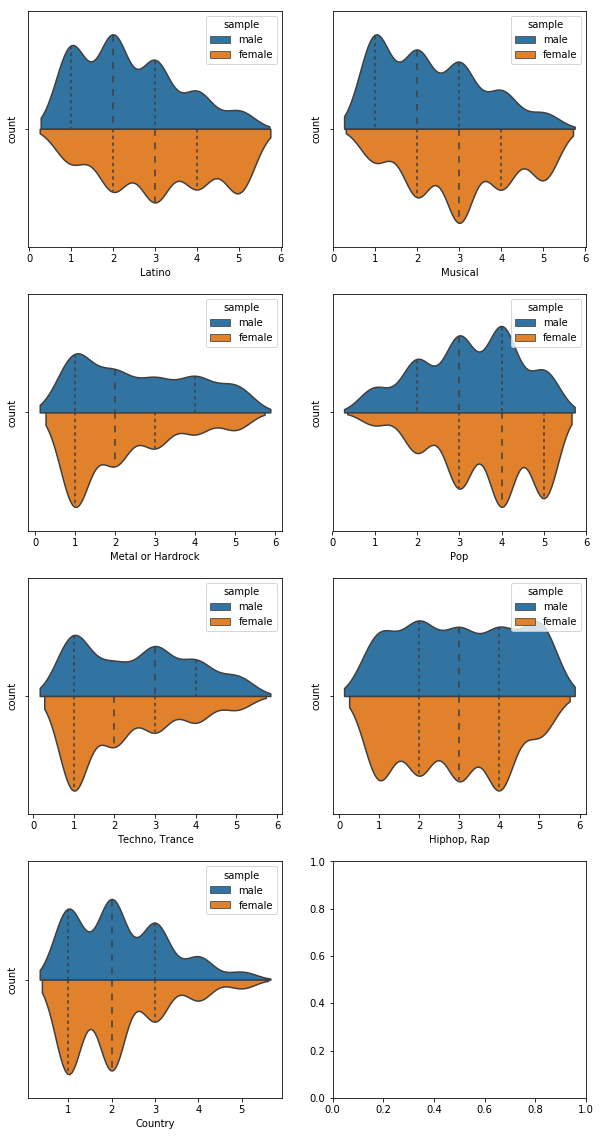

In [34]:
_ = plot_dist_compare(
    {
        'male': df[df['Gender'] == 'male'],
        'female': df[df['Gender'] == 'female']
    },
    sig[sig['ttest p']<0.05]['features']
)

Latino, for example, there is a clear difference between male and female, males tend to give lower ratings.  Others, like Country is not so obvious.

We can look deeper by checking for each of the sexes that, whether they like a particular genre or not. We do this by defining someone likes a genre if rating is 4 or 5, and dislikes a genre if rating is 1, 2 or 3.  We then count the number of people who likes or dislikes a genre, and use the Chi-squared test to see if this difference in numbers is due to sampling error, or likely to be real.

In [35]:
result1 = pref_stats(
    df[df['Gender'] == 'male'],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df['Gender'] == 'female'],
    sig[sig['ttest p']<0.05]['features']
)

print('male')
display(result1)
print('\nfemale')
display(result2)

male


,feature,N liked,N disliked,% like,chi2_p,significance
14,Latino,67,296,0.184573,2.810627e-33,extremely
4,Musical,67,296,0.184573,2.810627e-33,extremely
7,Metal or Hardrock,116,247,0.319559,6.167891e-12,extremely
5,Pop,165,198,0.454545,8.326452e-02,not significant
15,"Techno, Trance",101,262,0.278237,2.905341e-17,extremely
9,"Hiphop, Rap",149,214,0.410468,6.457920e-04,extremely
2,Country,47,316,0.129477,2.907443e-45,extremely



female


,feature,N liked,N disliked,% like,chi2_p,significance
14,Latino,223,306,0.421550,3.077404e-04,extremely
4,Musical,192,337,0.362949,2.894099e-10,extremely
7,Metal or Hardrock,93,436,0.175803,2.711080e-50,extremely
5,Pop,308,221,0.582231,1.551933e-04,extremely
15,"Techno, Trance",96,433,0.181474,1.304734e-48,extremely
9,"Hiphop, Rap",187,342,0.353497,1.593373e-11,extremely
2,Country,61,468,0.115312,4.529560e-70,extremely


So, this shows that 

- while both sexes did not like Latino and Musical that much, males clearly disliked them much more than females

- females overwhelmingly dislike Metal and Techno, while males disliked them less. 

What other conclusions can you draw?

## Age vs genre preferences

Let's look at the age distribution in the overall population first

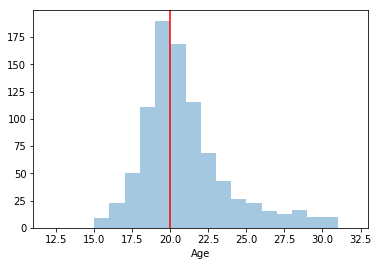

In [36]:
bins = range(12,33,1)
_ = sns.distplot(df['Age'], bins=bins, kde=None)
_ = plt.axvline(x=df['Age'].median(), color='red')

The median for age is at 20, it can be used as a dividing line for age categories:
- young people under the age of 20 (i.e. teens)
- young people 20 or above

### Genres where there is a significant age difference

In [37]:
sig = ttest_features(
    {
        'teens': df[df['Age'] < 20],
        'over 20s': df[df['Age'] >= 20]
    },
    genre_cols
)
display(sig)

,features,N teens,N over 20s,ttest p,significance
1,Folk,383,509,0.002648,highly
16,Opera,383,509,0.061452,not significant
2,Country,383,509,0.099010,not significant
15,"Techno, Trance",383,509,0.309096,not significant
0,Dance,383,509,0.388993,not significant
3,Classical music,383,509,0.520600,not significant
8,Punk,383,509,0.544518,not significant
9,"Hiphop, Rap",383,509,0.638663,not significant
5,Pop,383,509,0.694831,not significant
12,Rock n roll,383,509,0.707257,not significant


The only genre where a significant difference between the age groups is displayed is Folk, and even that has a small correlation coefficient

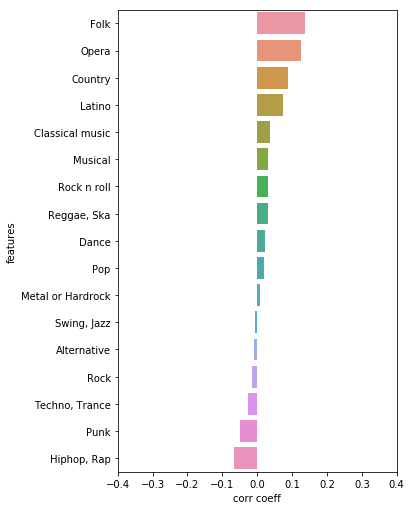

In [38]:
_ = plot_corr_ranking(
    df1, 'Age',
    df1, genre_cols,
    xlim=(-0.4,0.4)
)

Difference in distribution of ratings for Folk

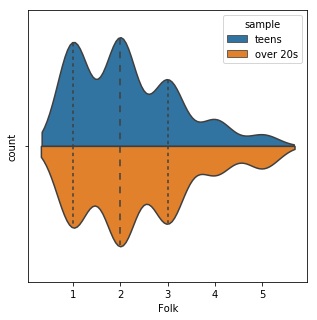

In [39]:
_ = plot_dist_compare(
    {
        'teens': df[df['Age'] < 20],
        'over 20s': df[df['Age'] >= 20]
    },
    sig[sig['ttest p']<0.05]['features']
)

In [40]:
result1 = pref_stats(
    df[df['Age'] < 20],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df['Age'] >= 20],
    sig[sig['ttest p']<0.05]['features']
)

print('teens')
display(result1)
print('\nover 20s')
display(result2)

teens


,feature,N liked,N disliked,% like,chi2_p,significance
1,Folk,46,337,0.120104,5.207377e-50,extremely



over 20s


,feature,N liked,N disliked,% like,chi2_p,significance
1,Folk,84,425,0.165029,1.298369e-51,extremely


So Folk is not that popular and even though stats show there is a highly significant (>90%) chance that over 20s behave differently from under 20s, the above result show that the difference is very small.

The over 20s seem to dislike Folk a little less than under 20s.

## City/Village vs genre preferences

### City/Village divide in the overall population

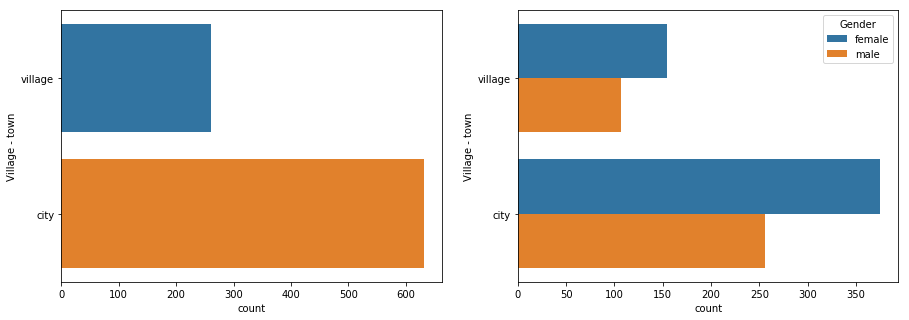

In [41]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
_ = sns.countplot(data = df, 
                 y = 'Village - town', 
                 ax = ax[0])
_ = sns.countplot(data = df, 
                 y = 'Village - town',
                 hue = 'Gender', 
                 ax = ax[1])

### Genres where there is a significant difference

In [42]:
sig = ttest_features(
    {
        'city': df[df['Village - town'] == 'city'],
        'village': df[df['Village - town'] == 'village']
    },
    genre_cols
)
display(sig)

,features,N city,N village,ttest p,significance
1,Folk,631,261,0.000269,extremely
2,Country,631,261,0.004836,highly
0,Dance,631,261,0.053093,not significant
15,"Techno, Trance",631,261,0.213168,not significant
4,Musical,631,261,0.258925,not significant
10,"Reggae, Ska",631,261,0.266355,not significant
7,Metal or Hardrock,631,261,0.272176,not significant
3,Classical music,631,261,0.288306,not significant
8,Punk,631,261,0.306959,not significant
11,"Swing, Jazz",631,261,0.331146,not significant


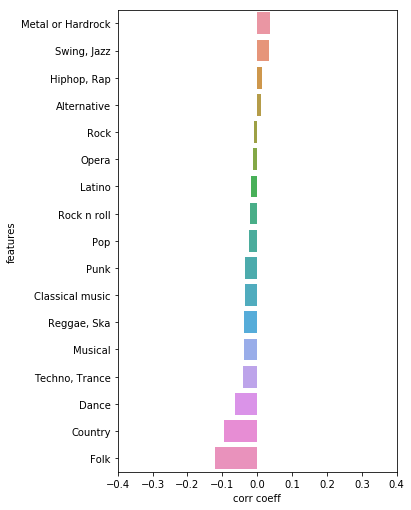

In [43]:
_ = plot_corr_ranking(
    df1, 'Village - town',
    df1, genre_cols,
    xlim=(-0.4,0.4)
)

In [44]:
result1 = pref_stats(
    df[df['Village - town'] == 'city'],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df['Village - town'] == 'village'],
    sig[sig['ttest p']<0.05]['features']
)

print('city')
display(result1)
print('\nvillage')
display(result2)

city


,feature,N liked,N disliked,% like,chi2_p,significance
1,Folk,79,552,0.125198,4.301175e-79,extremely
2,Country,62,569,0.098257,1.371265e-90,extremely



village


,feature,N liked,N disliked,% like,chi2_p,significance
1,Folk,51,210,0.195402,7.432908e-23,extremely
2,Country,46,215,0.176245,1.306955e-25,extremely


Both Country and Folk are unpopular, but more village folks likes them.

## Education vs genre preferences

### Education divide in the overall population

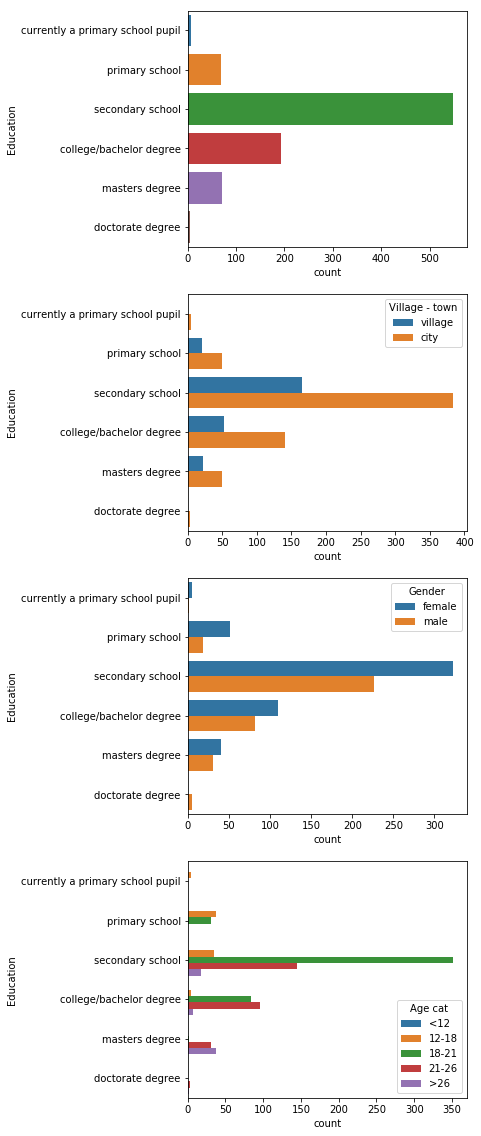

In [45]:
fig, ax = plt.subplots(4,1,figsize=(5, 20))
order = ['currently a primary school pupil',
         'primary school',
         'secondary school',
         'college/bachelor degree',
         'masters degree',
         'doctorate degree']
_ = sns.countplot(data = df, 
                 y = 'Education', 
                 order = order,
                 ax=ax[0])
_ = sns.countplot(data = df, 
                 y = 'Education',
                 order = order,
                 hue='Village - town', 
                 ax=ax[1])
_ = sns.countplot(data = df, 
                 y = 'Education',
                 order = order,
                 hue='Gender', 
                 ax=ax[2])

# for age it is best to reduce categories
df2 = df.copy()
def categorise_age(age):
    if age < 12:
        return '<12'
    elif age < 18:
        return '12-18'
    elif age < 21:
        return '18-21'
    elif age < 26:
        return '21-26'
    else:
        return '>26'
df2['Age cat'] = df['Age'].apply(categorise_age)

_ = sns.countplot(data = df2, 
                 y = 'Education',
                 order = order,
                 hue='Age cat',
                 hue_order=['<12',
                            '12-18',
                            '18-21',
                            '21-26',
                            '>26'],
                 ax=ax[3])

So, overwhelming percentage of the people taken part in the survey have secondary school qualifications.

Some are clearly too young to have gotten their qualifications. Most likely they have mistaken the question to be what they are currently doing (i.e. not yet graduated).

Some oddities: someone > 12 is still doing primary school.

Male and female divides are non-interesting, pretty follows the population divide. There are more males with postgraduate degrees

Village and town divide again follows the overall population pattern, nothing too interesting at the first glance.

Let's first look at the outliers:



### Outliers

The people who are currently doing primary school, are they children?

In [46]:
display(df[df['Education'] == 'currently a primary school pupil'][demo_cols])

,Only child,Village - town,House - block of flats,Education,Left - right handed,Gender,Number of siblings,Age,Height,Weight
158,no,village,block of flats,currently a primary school pupil,right handed,female,2.0,15.0,160.0,48.0
318,yes,city,house/bungalow,currently a primary school pupil,right handed,female,0.0,16.0,169.0,48.0
409,yes,city,block of flats,currently a primary school pupil,right handed,female,0.0,16.0,165.0,50.0
609,no,city,block of flats,currently a primary school pupil,right handed,male,2.0,18.0,188.0,73.0
649,no,city,block of flats,currently a primary school pupil,right handed,female,1.0,17.0,174.0,56.0
748,no,city,block of flats,currently a primary school pupil,right handed,female,2.0,15.0,160.0,51.0


18 years old and still not finished primary school??? 

Could be mistakes when filling in the survey?

How does the other attributes look? Reasonable?

How about the PhDs?

In [47]:
display(df[df['Education'] == 'doctorate degree'][demo_cols])

,Only child,Village - town,House - block of flats,Education,Left - right handed,Gender,Number of siblings,Age,Height,Weight
156,yes,city,block of flats,doctorate degree,left handed,male,1.0,25.0,177.0,97.0
636,no,village,house/bungalow,doctorate degree,right handed,male,2.0,24.0,171.0,93.0
668,yes,city,house/bungalow,doctorate degree,left handed,male,1.0,27.0,186.0,82.0
793,no,city,house/bungalow,doctorate degree,right handed,male,2.0,24.0,185.0,120.0
796,no,city,house/bungalow,doctorate degree,left handed,male,3.0,27.0,189.0,113.0


Does it look reasonable?

### Genres where there is a significant difference

We can divide the population into two categories:
- those who have are doing university or already have degrees
- those who do not have university degrees

In [48]:
sig = ttest_features(
    {
        'no degree': df1[df1['Education'] < 3],
        'has degree': df1[df1['Education'] >=3]
    },
    genre_cols
)
display(sig)

,features,N no degree,N has degree,ttest p,significance
1,Folk,624,268,0.000301,extremely
13,Alternative,624,268,0.007914,highly
11,"Swing, Jazz",624,268,0.014579,significant
16,Opera,624,268,0.031919,significant
2,Country,624,268,0.054672,not significant
3,Classical music,624,268,0.060294,not significant
9,"Hiphop, Rap",624,268,0.065559,not significant
14,Latino,624,268,0.133901,not significant
12,Rock n roll,624,268,0.194228,not significant
5,Pop,624,268,0.322048,not significant


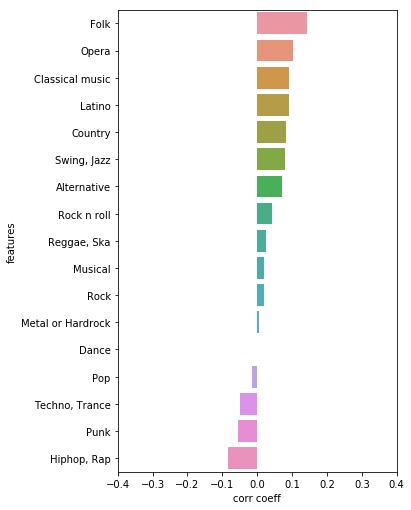

In [49]:
_ = plot_corr_ranking(
    df1, 'Education',
    df1, genre_cols,
    xlim=(-0.4,0.4)
)

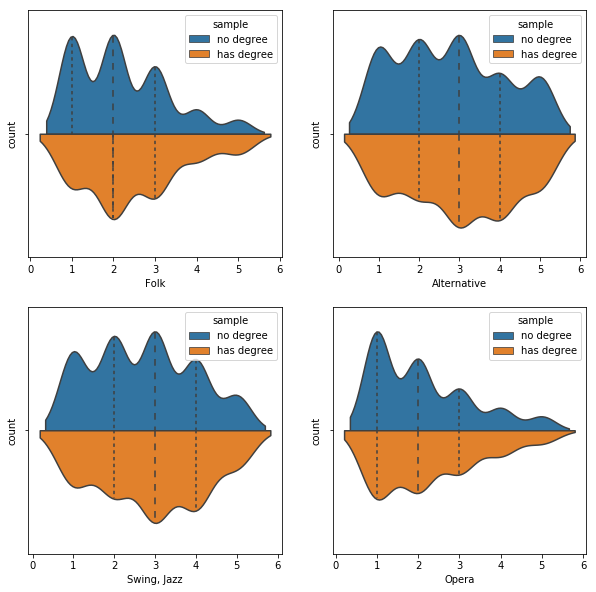

In [50]:
_ = plot_dist_compare(
    {
        'no degree': df1[df1['Education'] < 3],
        'has degree': df1[df1['Education'] >= 3]
    },
    sig[sig['ttest p']<0.05]['features']
)

In [51]:
result1 = pref_stats(
    df1[df1['Education'] < 3],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df1[df1['Education'] >= 3],
    sig[sig['ttest p']<0.05]['features']
)

print('no degree')
display(result1)
print('\nhas degree')
display(result2)

no degree


,feature,N liked,N disliked,% like,chi2_p,significance
1,Folk,79,545,0.126603,1.151531e-77,extremely
13,Alternative,184,440,0.294872,1.205655e-24,extremely
11,"Swing, Jazz",175,449,0.280449,5.399690e-28,extremely
16,Opera,91,533,0.145833,4.651059e-70,extremely



has degree


,feature,N liked,N disliked,% like,chi2_p,significance
1,Folk,51,217,0.190299,3.668596e-24,extremely
13,Alternative,105,163,0.391791,3.957319e-04,extremely
11,"Swing, Jazz",95,173,0.354478,1.892208e-06,extremely
16,Opera,49,219,0.182836,2.919911e-25,extremely


Taskes between the people have degree or not looks to be roughly the same.

People with degrees are more tolerant towards those four music genres.

# Correlations between music genres

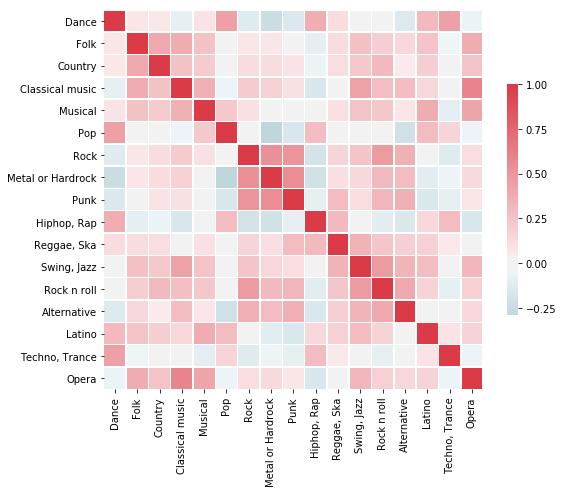

In [52]:
df = raw[genre_cols].dropna()

df1 = df.replace(num_mapping)

_ = plot_corr_heatmap(df1, genre_cols, 
                      df1, genre_cols)

Initial observations:
- people who liked Rock also liked Metal, Punk and Rock-n-roll, but dislikes Hiphop
- People who liked Pop also liked Hiphop and Latino, but disliked Metal and Alternative
- People who liked Rock-n-roll also liked Rock, Punk, Metal, Jazz and Alternative, and has a mild dislike for Hiphop
- People who liked Dance also liked Techno, Hiphop and Pop, but dislikes Metal
- people who liked Classical music also liked Opera and Jazz, while disliked Hiphop

# Music genre vs interests

In [53]:
df = raw[genre_cols + interests_cols].dropna()
display(df.head())

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Music,Movies,History,Psychology,Politics,Mathematics,Physics,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Adrenaline sports,Gardening,Celebrities,Shopping,Science and technology,Theatre,Pets,Flying,Healthy eating,Daily events
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,4.0,5.0,1.0,4.0,4.0,2.0,4.0,1.0,4.0,2.0
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,4.0,5.0,1.0,3.0,4.0,5.0,2.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,2.0,5.0,1.0,3.0,3.0
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,5.0,1.0,2.0,1.0,5.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,1.0,1.0,4.0,2.0,5.0,5.0,1.0,3.0,1.0
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,5.0,4.0,4.0,5.0,4.0,1.0,2.0,3.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,1.0,2.0,3.0,4.0
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,5.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,2.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,4.0,3.0


## Correlation heat map between music genre and interests

We should focus on the most popular interests, let's focus on the top 10 most popular interest

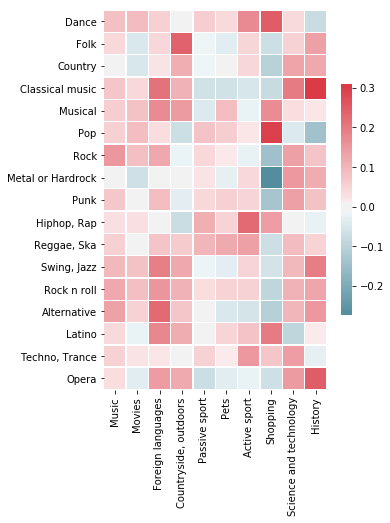

In [54]:
_ = plot_corr_heatmap(df, top10_interests,
                      df, genre_cols)

What insights can you draw from the above?

## Foreign languages

Again, we look at the results of null-hypothesis tests (which will tell us if the correlations we see are real); the correlations to music genres, and the break down of number of people like a genre or not.

,features,N like languages,N dislike languages,ttest p,significance
13,Alternative,525,299,1.568414e-09,extremely
3,Classical music,525,299,3.300417e-08,extremely
16,Opera,525,299,2.011447e-07,extremely
4,Musical,525,299,4.087687e-06,extremely
11,"Swing, Jazz",525,299,4.255242e-06,extremely
14,Latino,525,299,8.662026e-06,extremely
12,Rock n roll,525,299,2.678254e-05,extremely
6,Rock,525,299,4.463634e-03,highly
8,Punk,525,299,5.485506e-03,highly
10,"Reggae, Ska",525,299,1.898750e-02,significant


like languages


,feature,N liked,N disliked,% like,chi2_p,significance
13,Alternative,197,328,0.375238,1.082244e-08,extremely
3,Classical music,210,315,0.400000,4.592834e-06,extremely
16,Opera,98,427,0.186667,9.392297e-47,extremely
4,Musical,171,354,0.325714,1.385148e-15,extremely
11,"Swing, Jazz",190,335,0.361905,2.478466e-10,extremely
14,Latino,196,329,0.373333,6.452143e-09,extremely
12,Rock n roll,237,288,0.451429,2.602607e-02,significant
6,Rock,353,172,0.672381,2.800522e-15,extremely
8,Punk,131,394,0.249524,1.696585e-30,extremely
10,"Reggae, Ska",165,360,0.314286,1.731883e-17,extremely



dislike languages


,feature,N liked,N disliked,% like,chi2_p,significance
13,Alternative,72,227,0.240803,3.134460e-19,extremely
3,Classical music,68,231,0.227425,4.238663e-21,extremely
16,Opera,30,269,0.100334,1.884931e-43,extremely
4,Musical,67,232,0.224080,1.398388e-21,extremely
11,"Swing, Jazz",60,239,0.200669,4.105309e-25,extremely
14,Latino,67,232,0.224080,1.398388e-21,extremely
12,Rock n roll,98,201,0.327759,2.574706e-09,extremely
6,Rock,171,128,0.571906,1.289144e-02,significant
8,Punk,60,239,0.200669,4.105309e-25,extremely
10,"Reggae, Ska",71,228,0.237458,1.090302e-19,extremely


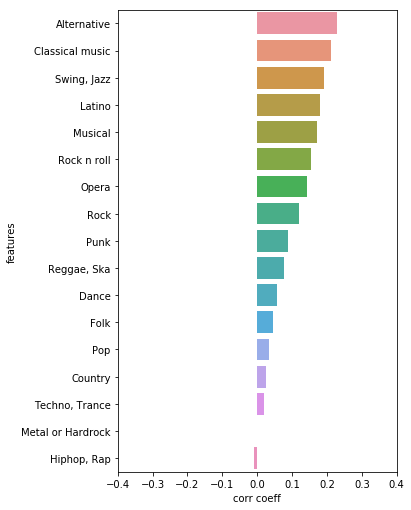

In [55]:
feature = 'Foreign languages'

sig = ttest_features(
    {
        'like languages': df[df[feature] > 3],
        'dislike languages': df[df[feature] <=3]
    },
    genre_cols
)
display(sig)

_ = plot_corr_ranking(
    df, feature,
    df, genre_cols,
    xlim=(-0.4,0.4)
)

result1 = pref_stats(
    df[df[feature] > 3],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df[feature] <= 3],
    sig[sig['ttest p']<0.05]['features']
)

print('like languages')
display(result1)
print('\ndislike languages')
display(result2)


## Countryside, outdoors

Again, we look at the results of null-hypothesis tests (which will tell us if the correlations we see are real); the correlations to music genres, and the break down of number of people like a genre or not.

,features,N like outdoors,N dislike outdoors,ttest p,significance
1,Folk,499,325,7.244637e-09,extremely
4,Musical,499,325,1.624059e-05,extremely
16,Opera,499,325,2.019003e-04,extremely
2,Country,499,325,2.774772e-04,extremely
11,"Swing, Jazz",499,325,3.023475e-04,extremely
9,"Hiphop, Rap",499,325,1.241112e-03,highly
3,Classical music,499,325,1.757178e-03,highly
14,Latino,499,325,3.846485e-03,highly
12,Rock n roll,499,325,1.048626e-02,significant
13,Alternative,499,325,1.298144e-02,significant


like outdoors


,feature,N liked,N disliked,% like,chi2_p,significance
1,Folk,91,408,0.182365,1.043576e-45,extremely
4,Musical,160,339,0.320641,1.118158e-15,extremely
16,Opera,94,405,0.188377,4.639186e-44,extremely
2,Country,76,423,0.152305,2.047008e-54,extremely
11,"Swing, Jazz",170,329,0.340681,1.096494e-12,extremely
9,"Hiphop, Rap",174,325,0.348697,1.382889e-11,extremely
3,Classical music,191,308,0.382766,1.626435e-07,extremely
14,Latino,176,323,0.352705,4.684787e-11,extremely
12,Rock n roll,219,280,0.438878,6.319326e-03,highly
13,Alternative,175,324,0.350701,2.555315e-11,extremely



dislike outdoors


,feature,N liked,N disliked,% like,chi2_p,significance
1,Folk,25,300,0.076923,1.542445e-52,extremely
4,Musical,78,247,0.240000,6.954836e-21,extremely
16,Opera,34,291,0.104615,4.125766e-46,extremely
2,Country,25,300,0.076923,1.542445e-52,extremely
11,"Swing, Jazz",80,245,0.246154,5.560353e-20,extremely
9,"Hiphop, Rap",131,194,0.403077,4.747527e-04,extremely
3,Classical music,87,238,0.267692,5.476949e-17,extremely
14,Latino,87,238,0.267692,5.476949e-17,extremely
12,Rock n roll,116,209,0.356923,2.486547e-07,extremely
13,Alternative,94,231,0.289231,2.975237e-14,extremely


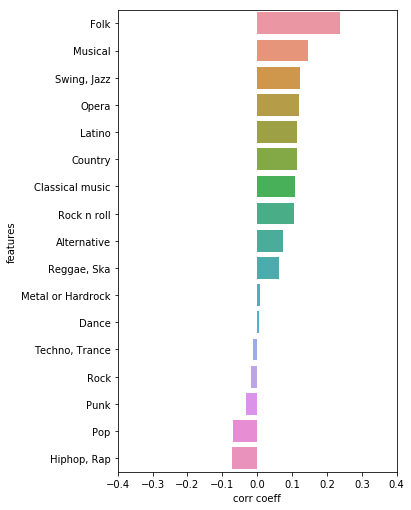

In [56]:
feature = 'Countryside, outdoors'

sig = ttest_features(
    {
        'like outdoors': df[df[feature] > 3],
        'dislike outdoors': df[df[feature] <=3]
    },
    genre_cols
)
display(sig)

_ = plot_corr_ranking(
    df, feature,
    df, genre_cols,
    xlim=(-0.4,0.4)
)

result1 = pref_stats(
    df[df[feature] > 3],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df[feature] <= 3],
    sig[sig['ttest p']<0.05]['features']
)

print('like outdoors')
display(result1)
print('\ndislike outdoors')
display(result2)


## Passive sport

Again, we look at the results of null-hypothesis tests (which will tell us if the correlations we see are real); the correlations to music genres, and the break down of number of people like a genre or not.

,features,N like passive sport,N dislike passive sport,ttest p,significance
10,"Reggae, Ska",410,414,0.038166,significant
9,"Hiphop, Rap",410,414,0.055340,not significant
15,"Techno, Trance",410,414,0.104814,not significant
5,Pop,410,414,0.168330,not significant
7,Metal or Hardrock,410,414,0.192352,not significant
4,Musical,410,414,0.263300,not significant
8,Punk,410,414,0.278848,not significant
12,Rock n roll,410,414,0.306904,not significant
0,Dance,410,414,0.307800,not significant
16,Opera,410,414,0.314851,not significant


like passive sport


,feature,N liked,N disliked,% like,chi2_p,significance
10,"Reggae, Ska",132,278,0.321951,5.577708e-13,extremely



dislike passive sport


,feature,N liked,N disliked,% like,chi2_p,significance
10,"Reggae, Ska",104,310,0.251208,4.308420e-24,extremely


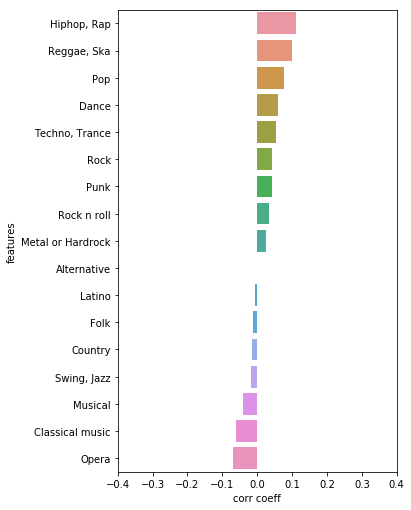

In [57]:
feature = 'Passive sport'

sig = ttest_features(
    {
        'like passive sport': df[df[feature] > 3],
        'dislike passive sport': df[df[feature] <=3]
    },
    genre_cols
)
display(sig)

_ = plot_corr_ranking(
    df, feature,
    df, genre_cols,
    xlim=(-0.4,0.4)
)

result1 = pref_stats(
    df[df[feature] > 3],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df[feature] <= 3],
    sig[sig['ttest p']<0.05]['features']
)

print('like passive sport')
display(result1)
print('\ndislike passive sport')
display(result2)


## Pets

Again, we look at the results of null-hypothesis tests (which will tell us if the correlations we see are real); the correlations to music genres, and the break down of number of people like a genre or not.

,features,N like pets,N dislike pets,ttest p,significance
10,"Reggae, Ska",418,406,0.001515,highly
4,Musical,418,406,0.027112,significant
5,Pop,418,406,0.034515,significant
3,Classical music,418,406,0.100198,not significant
0,Dance,418,406,0.115723,not significant
12,Rock n roll,418,406,0.129337,not significant
8,Punk,418,406,0.152426,not significant
16,Opera,418,406,0.170303,not significant
1,Folk,418,406,0.179068,not significant
9,"Hiphop, Rap",418,406,0.195154,not significant


like pets


,feature,N liked,N disliked,% like,chi2_p,significance
10,"Reggae, Ska",144,274,0.344498,2.037230e-10,extremely
4,Musical,126,292,0.301435,4.687821e-16,extremely
5,Pop,234,184,0.559809,1.446194e-02,significant



dislike pets


,feature,N liked,N disliked,% like,chi2_p,significance
10,"Reggae, Ska",92,314,0.226601,3.140664e-28,extremely
4,Musical,112,294,0.275862,1.677810e-19,extremely
5,Pop,198,208,0.487685,6.196886e-01,not significant


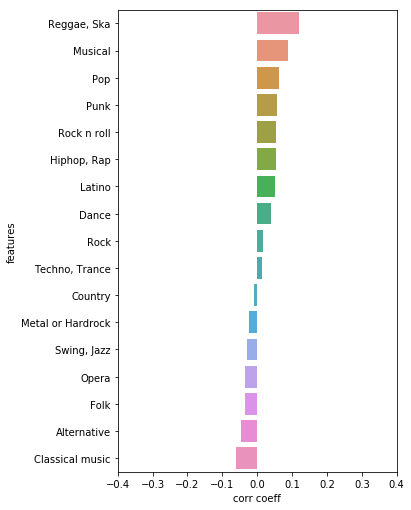

In [58]:
feature = 'Pets'

sig = ttest_features(
    {
        'like pets': df[df[feature] > 3],
        'dislike pets': df[df[feature] <=3]
    },
    genre_cols
)
display(sig)

_ = plot_corr_ranking(
    df, feature,
    df, genre_cols,
    xlim=(-0.4,0.4)
)

result1 = pref_stats(
    df[df[feature] > 3],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df[feature] <= 3],
    sig[sig['ttest p']<0.05]['features']
)

print('like pets')
display(result1)
print('\ndislike pets')
display(result2)


## Shopping

Again, we look at the results of null-hypothesis tests (which will tell us if the correlations we see are real); the correlations to music genres, and the break down of number of people like a genre or not.

,features,N like shopping,N dislike shopping,ttest p,significance
5,Pop,379,445,6.573252e-13,extremely
7,Metal or Hardrock,379,445,5.461747e-11,extremely
0,Dance,379,445,2.642710e-09,extremely
9,"Hiphop, Rap",379,445,3.727522e-05,extremely
6,Rock,379,445,9.888073e-05,extremely
14,Latino,379,445,1.838881e-04,extremely
8,Punk,379,445,4.466818e-04,extremely
4,Musical,379,445,7.041538e-04,extremely
2,Country,379,445,2.123677e-03,highly
13,Alternative,379,445,3.865551e-03,highly


like shopping


,feature,N liked,N disliked,% like,chi2_p,significance
5,Pop,241,138,0.635884,1.218127e-07,extremely
7,Metal or Hardrock,54,325,0.142480,4.766649e-44,extremely
0,Dance,167,212,0.440633,2.080554e-02,significant
9,"Hiphop, Rap",173,206,0.456464,9.005718e-02,not significant
6,Rock,217,162,0.572559,4.725698e-03,highly
14,Latino,145,234,0.382586,4.839613e-06,extremely
8,Punk,68,311,0.179420,9.352136e-36,extremely
4,Musical,127,252,0.335092,1.355434e-10,extremely
2,Country,41,338,0.108179,1.504869e-52,extremely
13,Alternative,101,278,0.266491,9.734172e-20,extremely



dislike shopping


,feature,N liked,N disliked,% like,chi2_p,significance
5,Pop,191,254,0.429213,2.822034e-03,highly
7,Metal or Hardrock,139,306,0.312360,2.441734e-15,extremely
0,Dance,139,306,0.312360,2.441734e-15,extremely
9,"Hiphop, Rap",132,313,0.296629,9.468949e-18,extremely
6,Rock,307,138,0.689888,1.134391e-15,extremely
14,Latino,118,327,0.265169,3.859946e-23,extremely
8,Punk,123,322,0.276404,3.966106e-21,extremely
4,Musical,111,334,0.249438,4.052155e-26,extremely
2,Country,60,385,0.134831,1.480657e-53,extremely
13,Alternative,168,277,0.377528,2.377597e-07,extremely


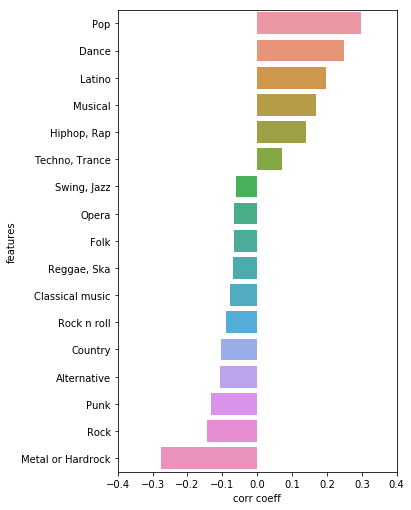

In [59]:
feature = 'Shopping'

sig = ttest_features(
    {
        'like shopping': df[df[feature] > 3],
        'dislike shopping': df[df[feature] <=3]
    },
    genre_cols
)
display(sig)

_ = plot_corr_ranking(
    df, feature,
    df, genre_cols,
    xlim=(-0.4,0.4)
)

result1 = pref_stats(
    df[df[feature] > 3],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df[feature] <= 3],
    sig[sig['ttest p']<0.05]['features']
)

print('like shopping')
display(result1)
print('\ndislike shopping')
display(result2)


## Active sport

Again, we look at the results of null-hypothesis tests (which will tell us if the correlations we see are real); the correlations to music genres, and the break down of number of people like a genre or not.

,features,N like active sport,N dislike active sport,ttest p,significance
9,"Hiphop, Rap",399,425,7.037175e-08,extremely
0,Dance,399,425,5.357002e-06,extremely
10,"Reggae, Ska",399,425,2.778941e-04,extremely
15,"Techno, Trance",399,425,4.636620e-04,extremely
12,Rock n roll,399,425,4.048846e-02,significant
14,Latino,399,425,6.841395e-02,not significant
13,Alternative,399,425,1.020251e-01,not significant
8,Punk,399,425,1.159195e-01,not significant
1,Folk,399,425,1.414722e-01,not significant
7,Metal or Hardrock,399,425,1.770489e-01,not significant


like active sport


,feature,N liked,N disliked,% like,chi2_p,significance
9,"Hiphop, Rap",176,223,0.441103,1.862549e-02,significant
0,Dance,173,226,0.433584,7.970457e-03,highly
10,"Reggae, Ska",136,263,0.340852,2.044608e-10,extremely
15,"Techno, Trance",91,308,0.228070,1.718611e-27,extremely
12,Rock n roll,176,223,0.441103,1.862549e-02,significant



dislike active sport


,feature,N liked,N disliked,% like,chi2_p,significance
9,"Hiphop, Rap",129,296,0.303529,5.464840e-16,extremely
0,Dance,133,292,0.312941,1.232482e-14,extremely
10,"Reggae, Ska",100,325,0.235294,9.869865e-28,extremely
15,"Techno, Trance",80,345,0.188235,8.126634e-38,extremely
12,Rock n roll,159,266,0.374118,2.099980e-07,extremely


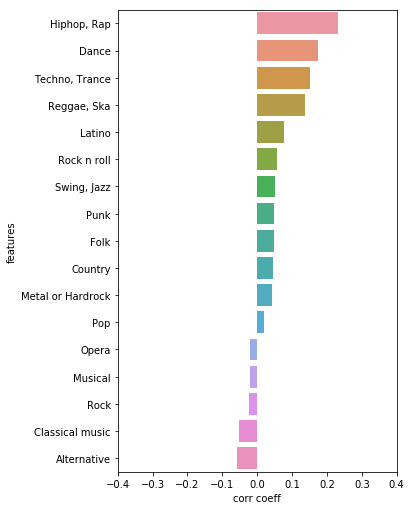

In [60]:
feature = 'Active sport'

sig = ttest_features(
    {
        'like active sport': df[df[feature] > 3],
        'dislike active sport': df[df[feature] <=3]
    },
    genre_cols
)
display(sig)

_ = plot_corr_ranking(
    df, feature,
    df, genre_cols,
    xlim=(-0.4,0.4)
)

result1 = pref_stats(
    df[df[feature] > 3],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df[feature] <= 3],
    sig[sig['ttest p']<0.05]['features']
)

print('like active sport')
display(result1)
print('\ndislike active sport')
display(result2)


## Science and Technology

Again, we look at the results of null-hypothesis tests (which will tell us if the correlations we see are real); the correlations to music genres, and the break down of number of people like a genre or not.

,features,N like science,N dislike science,ttest p,significance
3,Classical music,359,465,0.000001,extremely
15,"Techno, Trance",359,465,0.000241,extremely
7,Metal or Hardrock,359,465,0.000507,extremely
16,Opera,359,465,0.001467,highly
2,Country,359,465,0.002314,highly
8,Punk,359,465,0.002521,highly
14,Latino,359,465,0.012238,significant
12,Rock n roll,359,465,0.013821,significant
6,Rock,359,465,0.024966,significant
11,"Swing, Jazz",359,465,0.061453,not significant


like science


,feature,N liked,N disliked,% like,chi2_p,significance
3,Classical music,151,208,0.420613,2.626748e-03,highly
15,"Techno, Trance",91,268,0.253482,9.479716e-21,extremely
7,Metal or Hardrock,108,251,0.300836,4.445402e-14,extremely
16,Opera,71,288,0.197772,2.276129e-30,extremely
2,Country,56,303,0.155989,7.619782e-39,extremely
8,Punk,100,259,0.278552,4.791662e-17,extremely
14,Latino,102,257,0.284123,2.824642e-16,extremely
12,Rock n roll,158,201,0.440111,2.324078e-02,significant
6,Rock,239,120,0.665738,3.373127e-10,extremely



dislike science


,feature,N liked,N disliked,% like,chi2_p,significance
3,Classical music,127,338,0.273118,1.307365e-22,extremely
15,"Techno, Trance",80,385,0.172043,2.032823e-45,extremely
7,Metal or Hardrock,85,380,0.182796,1.331470e-42,extremely
16,Opera,57,408,0.122581,1.431938e-59,extremely
2,Country,45,420,0.096774,9.787739e-68,extremely
8,Punk,91,374,0.195699,2.405291e-39,extremely
14,Latino,161,304,0.346237,3.323686e-11,extremely
12,Rock n roll,177,288,0.380645,2.639786e-07,extremely
6,Rock,285,180,0.612903,1.120178e-06,extremely


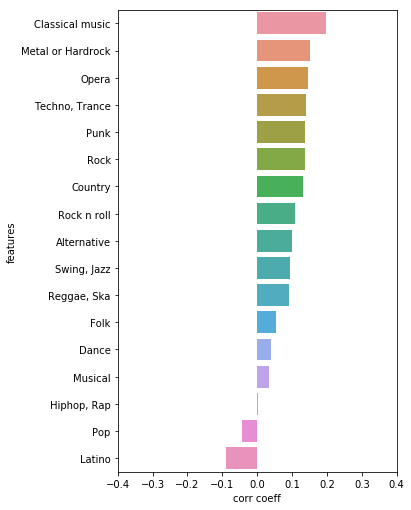

In [61]:
feature = 'Science and technology'

sig = ttest_features(
    {
        'like science': df[df[feature] > 3],
        'dislike science': df[df[feature] <=3]
    },
    genre_cols
)
display(sig)

_ = plot_corr_ranking(
    df, feature,
    df, genre_cols,
    xlim=(-0.4,0.4)
)

result1 = pref_stats(
    df[df[feature] > 3],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df[feature] <= 3],
    sig[sig['ttest p']<0.05]['features']
)

print('like science')
display(result1)
print('\ndislike science')
display(result2)


## History

Again, we look at the results of null-hypothesis tests (which will tell us if the correlations we see are real); the correlations to music genres, and the break down of number of people like a genre or not.

,features,N like history,N dislike history,ttest p,significance
3,Classical music,344,480,1.292386e-10,extremely
16,Opera,344,480,1.704165e-05,extremely
11,"Swing, Jazz",344,480,1.167289e-04,extremely
5,Pop,344,480,1.944361e-04,extremely
7,Metal or Hardrock,344,480,2.987453e-04,extremely
13,Alternative,344,480,3.582136e-04,extremely
12,Rock n roll,344,480,5.100857e-03,highly
6,Rock,344,480,1.332299e-02,significant
2,Country,344,480,1.494407e-02,significant
0,Dance,344,480,1.572423e-02,significant


like history


,feature,N liked,N disliked,% like,chi2_p,significance
3,Classical music,151,193,0.438953,2.354410e-02,significant
16,Opera,67,277,0.194767,1.016026e-29,extremely
11,"Swing, Jazz",125,219,0.363372,4.017212e-07,extremely
5,Pop,166,178,0.482558,5.176341e-01,not significant
7,Metal or Hardrock,103,241,0.299419,1.003343e-13,extremely
13,Alternative,132,212,0.383721,1.608277e-05,extremely
12,Rock n roll,156,188,0.453488,8.446903e-02,not significant
6,Rock,240,104,0.697674,2.256818e-13,extremely
2,Country,52,292,0.151163,2.678638e-38,extremely
0,Dance,113,231,0.328488,1.989702e-10,extremely



dislike history


,feature,N liked,N disliked,% like,chi2_p,significance
3,Classical music,127,353,0.264583,6.000488e-25,extremely
16,Opera,61,419,0.127083,5.092643e-60,extremely
11,"Swing, Jazz",125,355,0.260417,8.821497e-26,extremely
5,Pop,266,214,0.554167,1.762209e-02,significant
7,Metal or Hardrock,90,390,0.187500,1.116981e-42,extremely
13,Alternative,137,343,0.285417,5.324602e-21,extremely
12,Rock n roll,179,301,0.372917,2.569230e-08,extremely
6,Rock,284,196,0.591667,5.903578e-05,extremely
2,Country,49,431,0.102083,4.410720e-68,extremely
0,Dance,193,287,0.402083,1.782766e-05,extremely


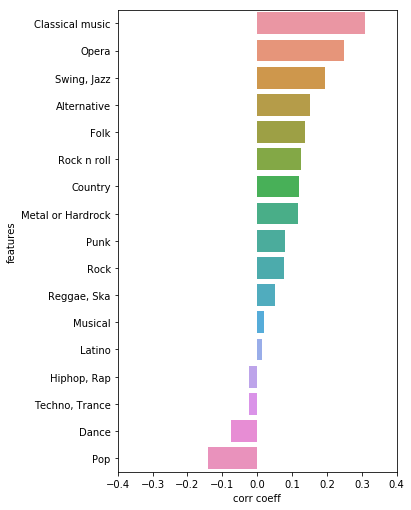

In [62]:
feature = 'History'

sig = ttest_features(
    {
        'like history': df[df[feature] > 3],
        'dislike history': df[df[feature] <=3]
    },
    genre_cols
)
display(sig)

_ = plot_corr_ranking(
    df, feature,
    df, genre_cols,
    xlim=(-0.4,0.4)
)

result1 = pref_stats(
    df[df[feature] > 3],
    sig[sig['ttest p']<0.05]['features']
)

result2 = pref_stats(
    df[df[feature] <= 3],
    sig[sig['ttest p']<0.05]['features']
)

print('like history')
display(result1)
print('\ndislike history')
display(result2)


# Correlation between interests

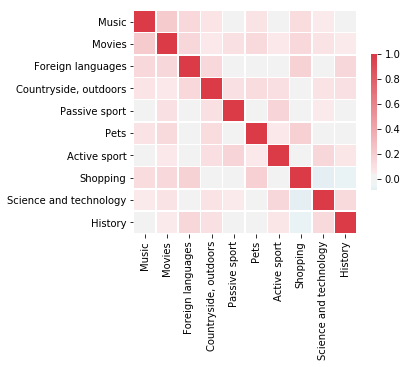

In [63]:
df = raw[top10_interests].dropna()

df1 = df.replace(num_mapping)

_ = plot_corr_heatmap(df1, top10_interests, 
                      df1, top10_interests)

# Correlation between interests and spending

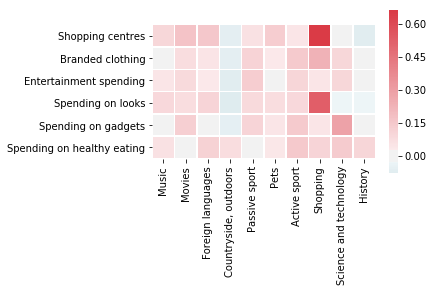

In [64]:
df = raw[top10_interests.tolist() + spending_cols].dropna()

df1 = df.replace(num_mapping)

_ = plot_corr_heatmap(df1, top10_interests, 
                      df1, spending_cols)

# Correlation between music genre and spending

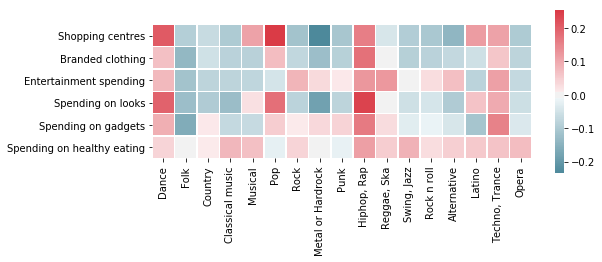

In [65]:
df = raw[genre_cols + spending_cols].dropna()

df1 = df.replace(num_mapping)

_ = plot_corr_heatmap(df1, genre_cols, 
                      df1, spending_cols)

# Correlation between spending habits

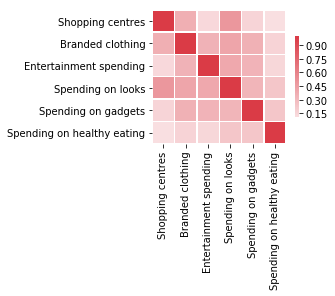

In [66]:
df = raw[spending_cols].dropna()

df1 = df.replace(num_mapping)

_ = plot_corr_heatmap(df1, spending_cols, 
                      df1, spending_cols)

If your radio station is a premium service, then who is likely to be willing to pay?

# Correlation between democraphics and interests

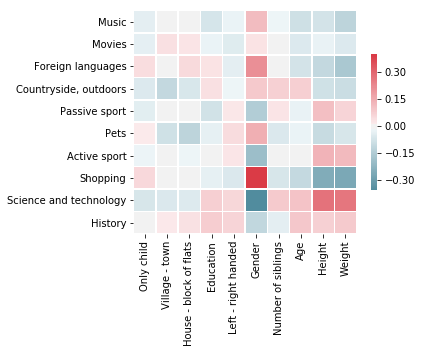

In [67]:
df = raw[top10_interests.tolist() + demo_cols].dropna()

df1 = df.replace(num_mapping)

_ = plot_corr_heatmap(df1, demo_cols, 
                      df1, top10_interests)

# Correlation between demographics and spending habits

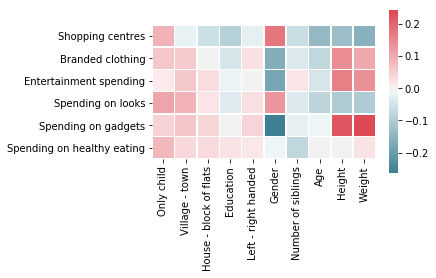

In [68]:
df = raw[spending_cols + demo_cols].dropna()

df1 = df.replace(num_mapping)

_ = plot_corr_heatmap(df1, demo_cols, 
                      df1, spending_cols)